## Map Search

In [1]:
BEIJING, CHANGCHUN, URUMQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK ="""
BEIJING CHUNGCHUN URUMQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

![]()

![Map](image/lesson01_map.png)

### 1. 问题描述：搜索长春到曼谷的航班路线？

In [2]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMQI: [BEIJING],
    BEIJING: [URUMQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [3]:
len(connection)

9

### 2.使用BFS（广度优先搜索）求解问题

### 2.1 连接图可视化

In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
graph = connection

In [7]:
g = nx.Graph(graph)

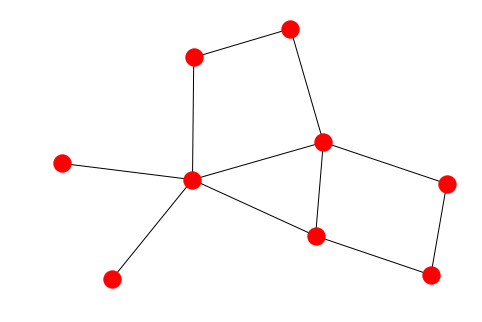

In [8]:
nx.draw(g)

### 2.2 搜索算法

### （1）原始算法

In [9]:
def navigator(start, destination, connection_graph):
    pathes = [start, ]
    seen = set()
    while pathes:
        frontier = pathes.pop()
        if frontier in seen:
            continue
        print('I am standing at:{}'.format(frontier))
        successors = connection_graph[frontier]
        for s in successors:
            print('\t-----I am look forward:{}'.format(s))
            if s == destination: 
                return pathes
        pathes += successors
        seen.add(frontier)

In [10]:
navigator(BEIJING, BANGKOK, connection)

I am standing at:BEIJING
	-----I am look forward:URUMQI
	-----I am look forward:CHUNGCHUN
	-----I am look forward:WUHAN
	-----I am look forward:SHENZHEN
	-----I am look forward:NEWYORK
I am standing at:NEWYORK
	-----I am look forward:BEIJING
	-----I am look forward:SHANGHAI
I am standing at:SHANGHAI
	-----I am look forward:NEWYORK
	-----I am look forward:WUHAN
I am standing at:WUHAN
	-----I am look forward:SHANGHAI
	-----I am look forward:BEIJING
	-----I am look forward:GUANGZHOU
I am standing at:GUANGZHOU
	-----I am look forward:WUHAN
	-----I am look forward:BANGKOK


['URUMQI',
 'CHUNGCHUN',
 'WUHAN',
 'SHENZHEN',
 'BEIJING',
 'NEWYORK',
 'SHANGHAI',
 'BEIJING']

### （2） 增加最终搜索路径

In [11]:
def navigator2(start, destination, connection_graph):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop()
        frontier = path[-1]
        if frontier in seen:
            continue
        successors = connection_graph[frontier]
        for s in successors:
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path+[s])
        seen.add(frontier)

In [12]:
navigator2(URUMQI, BANGKOK, connection)

['URUMQI', 'BEIJING', 'NEWYORK', 'SHANGHAI', 'WUHAN', 'GUANGZHOU', 'BANGKOK']

In [13]:
def draw_route(routes):
    print("✈️->".join(routes))

In [14]:
draw_route(navigator2(URUMQI, BANGKOK, connection))

URUMQI✈️->BEIJING✈️->NEWYORK✈️->SHANGHAI✈️->WUHAN✈️->GUANGZHOU✈️->BANGKOK


### （3）优化为最短路径

In [15]:
def navigator3(start, destination, connection_graph):
    pathes = [[start]]
    seen = set()
    while pathes:
        # 移除第一个元素，默认移除最后一个元素
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in seen:
            continue
        successors = connection_graph[frontier]
        
        for s in successors:
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path+[s])
        # 按照元素列表长度排序
        pathes = sorted(pathes, key=len)
        seen.add(frontier)

In [16]:
draw_route(navigator3(URUMQI, BANGKOK, connection))

URUMQI✈️->BEIJING✈️->SHENZHEN✈️->BANGKOK


### 3. BFS 和 DFS 的区别

In [17]:
def navigator_bfs(start, destination, connection_graph):
    pathes = [start]
    seen = set()
    while pathes:
        frontier = pathes.pop(0)
        
        if frontier in seen:
            continue
        successors = connection_graph[frontier]
        print('standing at {} Looking forward {}'.format(frontier, successors))
        pathes = pathes + successors
        seen.add(frontier)

In [18]:
def navigator_dfs(start, destination, connection_graph):
    pathes = [start]
    seen = set()
    while pathes:
        frontier = pathes.pop(0)
        if frontier in seen:
            continue
        successor = connection_graph[frontier]
        print('standing at {} Looking forward {}'.format(frontier, successor))
        pathes = successor + pathes
        seen.add(frontier)

![](image/lesson01_dfs.png)

In [19]:
connection_2 = {
    0: [1, 5],
    1: [0, 2],
    2: [1, 3],
    3: [2, 4],
    4: [3],
    5: [0, 6],
    6: [5, 7],
    7: [6]
}

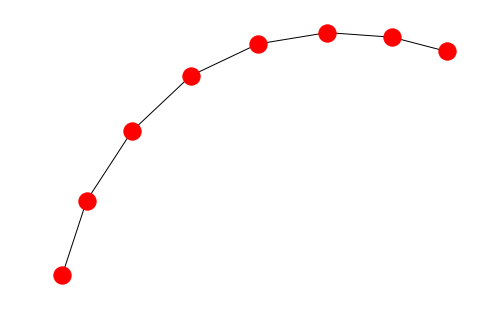

In [20]:
nx.draw(nx.Graph(connection_2))

In [21]:
navigator_bfs(0, 7, connection_2)

standing at 0 Looking forward [1, 5]
standing at 1 Looking forward [0, 2]
standing at 5 Looking forward [0, 6]
standing at 2 Looking forward [1, 3]
standing at 6 Looking forward [5, 7]
standing at 3 Looking forward [2, 4]
standing at 7 Looking forward [6]
standing at 4 Looking forward [3]


In [22]:
navigator_dfs(0, 7, connection_2)

standing at 0 Looking forward [1, 5]
standing at 1 Looking forward [0, 2]
standing at 2 Looking forward [1, 3]
standing at 3 Looking forward [2, 4]
standing at 4 Looking forward [3]
standing at 5 Looking forward [0, 6]
standing at 6 Looking forward [5, 7]
standing at 7 Looking forward [6]


## Sentence Generation

In [23]:
grammar = """
stmt = if block else block
block = cmp; assignment
assignment = XXX
XXX
"""

In [24]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | num
op = + | - | * | /
"""

In [25]:
grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

### 1. 用语法随机生成

In [26]:
import random

In [27]:
def adj():
    return random.choice(['蓝色的', '好看的', '小小的'])

In [28]:
adj()

'好看的'

In [29]:
def noun():
    return random.choice("女人 | 篮球 | 桌子 | 小猫".split("|"))

In [30]:
noun()

' 篮球 '

直接用语法随机生成的问题：代码复用性差，grammar修改后代码无法继续使用。

### 2. Data Driven的实现思路

In [31]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line:
            continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [32]:
g = parse_grammar(grammar)

In [33]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [34]:
def  gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed:
        return target
    rules = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, r) for r in rules if r != 'null')

In [35]:
gene(g)

'一个小猫看见一个好看的小小的桌子'

In [36]:
gene(parse_grammar(decimal_grammar, sep='='), target='expression')

'4*2+4+1'

In [37]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

0+2*4*1
3/2-3/2
3*0+1/4
1-4/1-1
0*1/0/1
3+3*0-2
3-2*3+4
1+2-3+1
4+4+2+2
4*0+4+3
2/1+4/0
4+1+2+1
4-0-0*2
0+3/4*0
2+1-2*4
3*2+1*2
3-0/4*0
0-4-4*3
3/3+2/4
2*3+3/2


DataDriven的思路总结：注重对问题的建模，模型能够处理未知的输入。